In [1]:
import pandas as pd

url = 'https://github.com/obulygin/SkillFactory/blob/main/ecommerce-data.zip?raw=true'

df_origin = pd.read_csv(url, encoding='ISO-8859-1', compression='zip')

df = df_origin.copy()

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
display(df.head())
display(df.tail())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df = df[(df['UnitPrice']>0) & (df['Quantity']>0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [6]:
#Looking for duplicates
print(df.duplicated().sum())

5226


In [7]:
#Droping duplicates
df.drop_duplicates(inplace=True)
print(df.shape)

(524878, 8)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524878 non-null  object 
 1   StockCode    524878 non-null  object 
 2   Description  524878 non-null  object 
 3   Quantity     524878 non-null  int64  
 4   InvoiceDate  524878 non-null  object 
 5   UnitPrice    524878 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      524878 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.0+ MB


In [9]:
df.CustomerID = df.CustomerID.astype('Int64')   #Need to convert to Int64 not int64, because of Nan objects so use pandas data type (Int64)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   392692 non-null  Int64         
 7   Country      524878 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 36.5+ MB


In [11]:
#How many transactions in country perspective (using value_count)
df.Country.value_counts()

United Kingdom          479985
Germany                   9025
France                    8392
EIRE                      7879
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1958
Portugal                  1492
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon 

In [12]:
df.Country.value_counts().nlargest(10)

United Kingdom    479985
Germany             9025
France              8392
EIRE                7879
Spain               2479
Netherlands         2359
Belgium             2031
Switzerland         1958
Portugal            1492
Australia           1181
Name: Country, dtype: int64

In [13]:
#How many unique clients in countries
countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
countries

Country
United Kingdom          3920
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Greece                     4
EIRE                       3
Israel                     3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Lithuania                  1
Czech Republic             1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

In [14]:
#Top 5 most valueble customers in cintext of unique InvoiceID   
df.info()
mvp_customers = df.groupby('CustomerID')['InvoiceNo'].nunique().nlargest(5)
mvp_customers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   392692 non-null  Int64         
 7   Country      524878 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 36.5+ MB


CustomerID
12748    209
14911    201
17841    124
13089     97
14606     93
Name: InvoiceNo, dtype: int64

In [15]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%y-%m')

<AxesSubplot: xlabel='InvoiceMonth'>

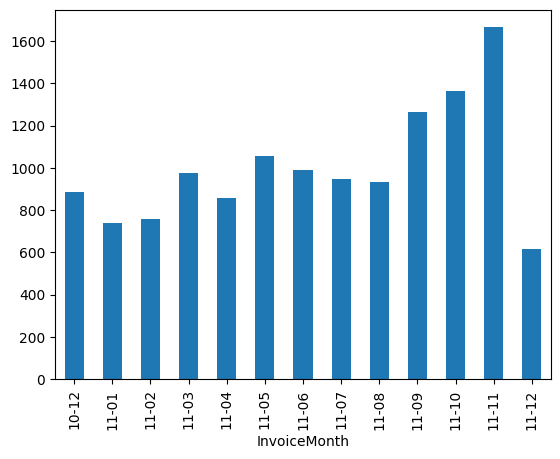

In [16]:
df.groupby('InvoiceMonth')['CustomerID'].nunique().plot(kind='bar')

In [17]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek + 1

<AxesSubplot: xlabel='DayOfWeek'>

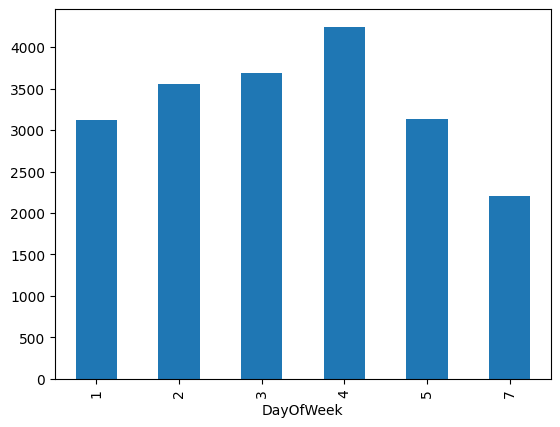

In [18]:
df.groupby('DayOfWeek')['InvoiceNo'].nunique().plot(kind='bar')

In [19]:
#Hours feature
df['HoursInfo'] = df['InvoiceDate'].dt.hour

<AxesSubplot: xlabel='HoursInfo'>

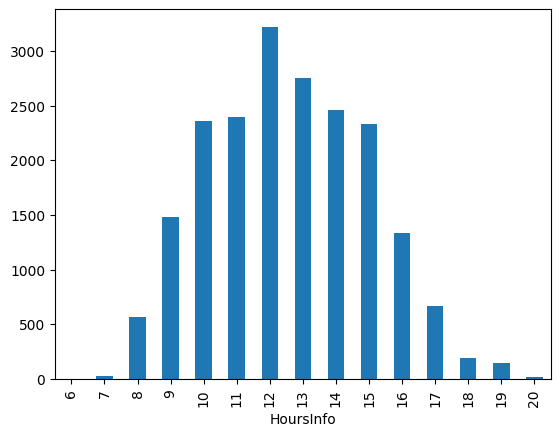

In [20]:
#Dinamic of sales on the hours-gap scale
df.groupby('HoursInfo')['InvoiceNo'].nunique().plot(kind='bar')

In [21]:
#Creating revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

<AxesSubplot: xlabel='InvoiceMonth'>

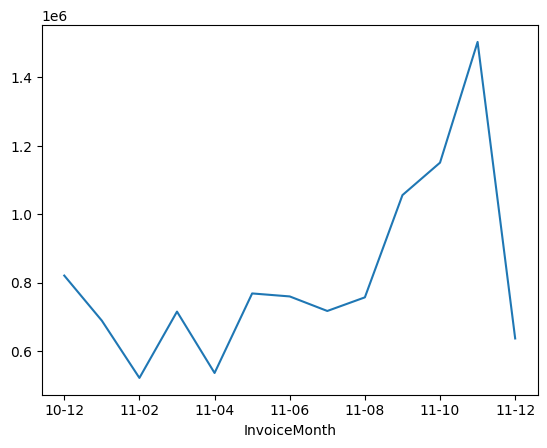

In [22]:
#Revenue by month
df.groupby('InvoiceMonth')['Revenue'].sum().plot()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     524878 non-null  object        
 1   StockCode     524878 non-null  object        
 2   Description   524878 non-null  object        
 3   Quantity      524878 non-null  int64         
 4   InvoiceDate   524878 non-null  datetime64[ns]
 5   UnitPrice     524878 non-null  float64       
 6   CustomerID    392692 non-null  Int64         
 7   Country       524878 non-null  object        
 8   InvoiceMonth  524878 non-null  object        
 9   DayOfWeek     524878 non-null  int64         
 10  HoursInfo     524878 non-null  int64         
 11  Revenue       524878 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 52.6+ MB


In [24]:
df.groupby('Country')['Revenue'].sum().nlargest(4)[1:4]     #.drop(labels='United Kingdom')

Country
Netherlands    285446.34
EIRE           283140.52
Germany        228678.40
Name: Revenue, dtype: float64

In [25]:
def price_segmentation(row):
    if row < 5:
        return 'cheap'
    elif 5 <= row < 25:
        return 'low-middle'
    elif 25 <= row < 100:
        return 'upper-middle'
    else:
        return 'expensive'

df['PriceSegment'] = df['UnitPrice'].apply(price_segmentation)
df.groupby('PriceSegment')['StockCode'].nunique().sort_values(ascending=False)

PriceSegment
cheap           3425
low-middle      1530
upper-middle      97
expensive         14
Name: StockCode, dtype: int64

<AxesSubplot: ylabel='Revenue'>

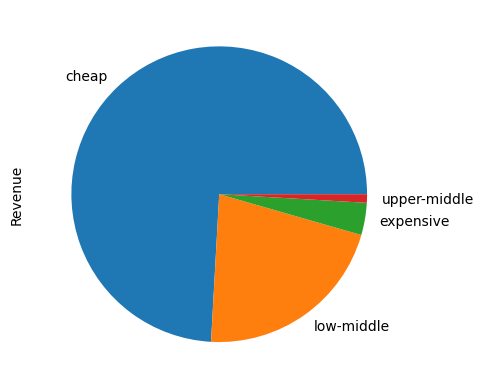

In [26]:
df.groupby('PriceSegment')['Revenue'].sum().sort_values(ascending=False).plot(kind='pie')

In [27]:
#Dinamic of average check price
df.groupby('InvoiceMonth')['Revenue'].sum().divide(df.groupby('InvoiceMonth')['InvoiceNo'].nunique())

InvoiceMonth
10-12    526.910026
11-01    635.185645
11-02    475.041418
11-03    492.582710
11-04    430.953845
11-05    457.642243
11-06    496.116771
11-07    486.831268
11-08    556.826877
11-09    575.087203
11-10    564.344966
11-11    543.108263
11-12    778.742772
dtype: float64

In [28]:
#Pivot table

country = 'France'
table = pd.pivot_table(
    df[df['Country'] == country],
    index= 'CustomerID',
    columns= 'InvoiceMonth',
    aggfunc= 'sum',
    values= 'Revenue',
    fill_value=0)

#highlightning max values
#table
#table.style.highlight_max()
table.style.background_gradient(cmap='PuBu')

InvoiceMonth,10-12,11-01,11-02,11-03,11-04,11-05,11-06,11-07,11-08,11-09,11-10,11-11,11-12
CustomerID,,,,,,,,,,,,,
12413,0.000000,479.250000,0.000000,0.000000,84.650000,0.000000,0.000000,0.000000,0.000000,0.000000,194.200000,0.000000,0.000000
12437,0.000000,392.700000,590.260000,147.710000,209.100000,635.320000,501.640000,0.000000,0.000000,557.280000,263.460000,1488.040000,165.900000
12441,173.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,553.390000,214.060000,531.210000,0.000000
12489,0.000000,334.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12490,0.000000,864.220000,0.000000,0.000000,0.000000,331.500000,484.060000,412.930000,424.060000,1035.820000,0.000000,1403.040000,462.300000
12491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,460.400000,0.000000
12493,0.000000,0.000000,0.000000,0.000000,0.000000,232.500000,201.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12494,62.550000,0.000000,250.000000,0.000000,0.000000,403.090000,0.000000,153.220000,0.000000,0.000000,214.740000,162.500000,0.000000


In [38]:
table2 = pd.pivot_table(
    df,
    index= 'Country',
    columns= 'InvoiceMonth',
    aggfunc= 'nunique',
    values= 'Quantity',
    fill_value=0)

table2

InvoiceMonth,10-12,11-01,11-02,11-03,11-04,11-05,11-06,11-07,11-08,11-09,11-10,11-11,11-12
Country,,,,,,,,,,,,,
Australia,10,26,28,28,8,27,27,19,28,24,29,19,0
Austria,5,0,9,10,9,9,0,9,7,0,8,12,4
Bahrain,1,0,0,0,0,8,0,0,0,0,0,0,0
Belgium,15,11,12,16,15,16,15,16,18,19,18,17,13
Brazil,0,0,0,0,7,0,0,0,0,0,0,0,0
Canada,0,0,0,5,0,1,15,12,3,0,0,0,0
Channel Islands,6,10,4,14,8,9,9,0,16,13,14,11,4
Cyprus,19,6,17,10,0,0,9,0,0,1,14,10,0
Czech Republic,0,0,7,0,0,0,0,0,0,0,5,0,0


In [40]:
products = df[df['Country'] == country].groupby(['CustomerID','InvoiceNo'], as_index=False)['Revenue'].sum()
display(products)

,CustomerID,InvoiceNo,Revenue
0,12413,540365,479.25
1,12413,550338,84.65
2,12413,569402,194.20
3,12437,540972,392.70
4,12437,543030,150.50
...,...,...,...
384,12736,540688,234.00
385,12740,570030,427.60
386,14277,552826,1629.03
387,14277,577152,499.40


In [41]:
products = products.groupby('CustomerID').agg({'InvoiceNo': ['count'], 'Revenue' : ['sum', 'mean']})
display(products)

InvoiceNo  Revenue             
               count      sum         mean
CustomerID                                
12413              3   758.10   252.700000
12437             18  4951.41   275.078333
12441              1   173.55   173.550000
12488              3  1298.66   432.886667
12489              1   334.93   334.930000
...              ...      ...          ...
12734              1   110.40   110.400000
12735              2   779.57   389.785000
12736              1   234.00   234.000000
12740              1   427.60   427.600000
14277              3  4188.00  1396.000000

[87 rows x 3 columns]

In [42]:
table_plus = pd.merge(table, products, on= 'CustomerID')
#table_plus.style.highlight_max()
table_plus.style.background_gradient(cmap= 'PuBu')

C:\Users\nayor\AppData\Local\Temp\ipykernel_7796\1359197420.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  table_plus = pd.merge(table, products, on= 'CustomerID')


,10-12,11-01,11-02,11-03,11-04,11-05,11-06,11-07,11-08,11-09,11-10,11-11,11-12,"('InvoiceNo', 'count')","('Revenue', 'sum')","('Revenue', 'mean')"
CustomerID,,,,,,,,,,,,,,,,
12413,0.000000,479.250000,0.000000,0.000000,84.650000,0.000000,0.000000,0.000000,0.000000,0.000000,194.200000,0.000000,0.000000,3,758.100000,252.700000
12437,0.000000,392.700000,590.260000,147.710000,209.100000,635.320000,501.640000,0.000000,0.000000,557.280000,263.460000,1488.040000,165.900000,18,4951.410000,275.078333
12441,173.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,173.550000,173.550000
12488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,553.390000,214.060000,531.210000,0.000000,3,1298.660000,432.886667
12489,0.000000,334.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,334.930000,334.930000
12490,0.000000,864.220000,0.000000,0.000000,0.000000,331.500000,484.060000,412.930000,424.060000,1035.820000,0.000000,1403.040000,462.300000,10,5417.930000,541.793000
12491,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,460.400000,0.000000,1,460.400000,460.400000
12493,0.000000,0.000000,0.000000,0.000000,0.000000,232.500000,201.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,433.740000,216.870000
12494,62.550000,0.000000,250.000000,0.000000,0.000000,403.090000,0.000000,153.220000,0.000000,0.000000,214.740000,162.500000,0.000000,7,1246.100000,178.014286


In [45]:
#Cohort analisys
cohorts = df.groupby('CustomerID', as_index=False)['InvoiceMonth'].min()
cohorts.rename(columns= {'InvoiceMonth':'Cohort'}, inplace=True)
cohorts.head()

,CustomerID,Cohort
0,12346,11-01
1,12347,10-12
2,12348,10-12
3,12349,11-11
4,12350,11-02


In [48]:
df_merged = pd.merge(df.dropna(), cohorts, how= 'left', on='CustomerID')
df_merged.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,DayOfWeek,HoursInfo,Revenue,PriceSegment,Cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,10-12,3,8,15.30,cheap,10-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,10-12,3,8,20.34,cheap,10-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,10-12,3,8,22.00,cheap,10-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,10-12,3,8,20.34,cheap,10-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,10-12,3,8,20.34,cheap,10-12


<AxesSubplot: xlabel='Cohort'>

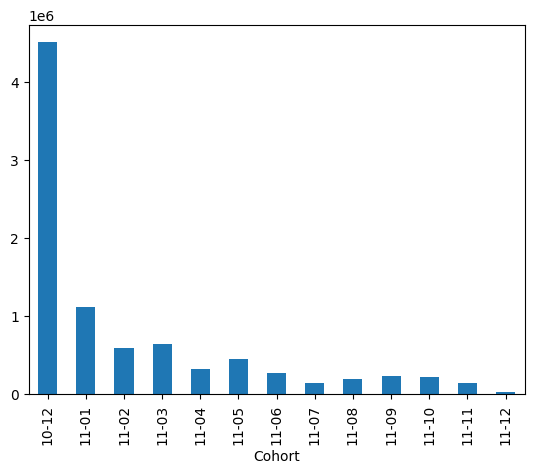

In [50]:
df_merged.groupby('Cohort')['Revenue'].sum().plot(kind='bar')

In [ ]:
#Customer retention
